## 3.1. Feature Scaling

### 3.1.1. Standardization

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


plt.rcParams["figure.figsize"] = [8,6]
sns.set_style("darkgrid")

titanic_data = sns.load_dataset('titanic')

titanic_data  = titanic_data[["age","fare","pclass"]]
titanic_data.head()

,age,fare,pclass
0,22.0,7.2500,3
1,38.0,71.2833,1
2,26.0,7.9250,3
3,35.0,53.1000,1
4,35.0,8.0500,3


In [2]:
titanic_data.describe()

,age,fare,pclass
count,714.000000,891.000000,891.000000
mean,29.699118,32.204208,2.308642
std,14.526497,49.693429,0.836071
min,0.420000,0.000000,1.000000
25%,20.125000,7.910400,2.000000
50%,28.000000,14.454200,3.000000
75%,38.000000,31.000000,3.000000
max,80.000000,512.329200,3.000000


In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(titanic_data)

titanic_data_scaled = scaler.transform(titanic_data)

In [4]:
titanic_data_scaled = pd.DataFrame(titanic_data_scaled, columns = titanic_data.columns)
titanic_data_scaled.head()

,age,fare,pclass
0,-0.530377,-0.502445,0.827377
1,0.571831,0.786845,-1.566107
2,-0.254825,-0.488854,0.827377
3,0.365167,0.420730,-1.566107
4,0.365167,-0.486337,0.827377


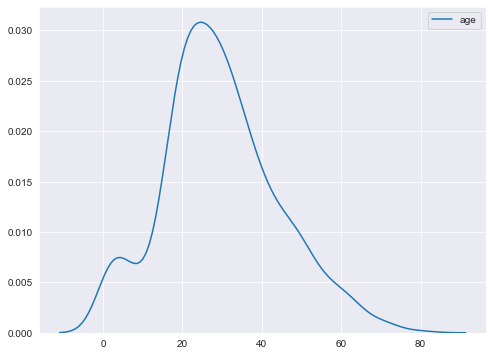

In [5]:
sns.kdeplot(titanic_data['age'])

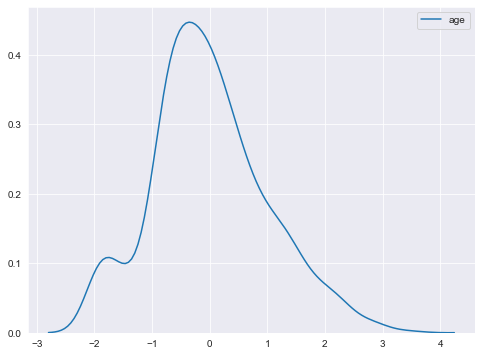

In [6]:
sns.kdeplot(titanic_data_scaled['age'])

### 3.1.2. Min/Max Scaling

In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(titanic_data)

titanic_data_scaled = scaler.transform(titanic_data)

In [8]:
titanic_data_scaled = pd.DataFrame(titanic_data_scaled, columns = titanic_data.columns)
titanic_data_scaled.head()

,age,fare,pclass
0,0.271174,0.014151,1.0
1,0.472229,0.139136,0.0
2,0.321438,0.015469,1.0
3,0.434531,0.103644,0.0
4,0.434531,0.015713,1.0


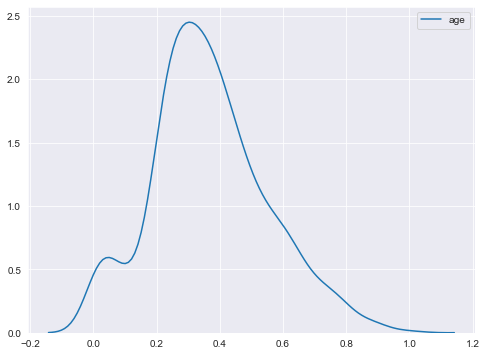

In [9]:
sns.kdeplot(titanic_data_scaled['age'])

### 3.1.3. Mean Normalization

In [10]:
mean_vals = titanic_data.mean(axis=0)
mean_vals

age       29.699118
fare      32.204208
pclass     2.308642
dtype: float64

In [11]:
range_vals = titanic_data.max(axis=0) - titanic_data.min(axis=0)
range_vals

age        79.5800
fare      512.3292
pclass      2.0000
dtype: float64

In [12]:
titanic_data_scaled = (titanic_data - mean_vals) / range_vals

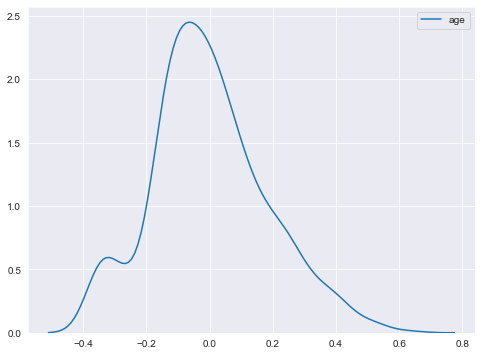

In [13]:
sns.kdeplot(titanic_data_scaled['age'])

## 3.2. Handling Missing Data

### 3.2.1. Handling Missing Numerical Data

#### Mean and Median Imputation

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = [8,6]
sns.set_style("darkgrid")

titanic_data = sns.load_dataset('titanic')

titanic_data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [23]:
titanic_data  = titanic_data[["survived", "pclass", "age", "fare"]]
titanic_data.head()

,survived,pclass,age,fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [24]:
titanic_data.isnull().mean()

survived    0.000000
pclass      0.000000
age         0.198653
fare        0.000000
dtype: float64

In [25]:
median = titanic_data.age.median()
print(median)

mean = titanic_data.age.mean()
print(mean)

28.0
29.69911764705882


In [26]:
import numpy as np

titanic_data['Median_Age'] = titanic_data.age.fillna(median)

titanic_data['Mean_Age'] = titanic_data.age.fillna(mean)

titanic_data['Mean_Age']  = np.round(titanic_data['Mean_Age'], 1)

titanic_data.head(20)

,survived,pclass,age,fare,Median_Age,Mean_Age
0,0,3,22.0,7.2500,22.0,22.0
1,1,1,38.0,71.2833,38.0,38.0
2,1,3,26.0,7.9250,26.0,26.0
3,1,1,35.0,53.1000,35.0,35.0
4,0,3,35.0,8.0500,35.0,35.0
5,0,3,NaN,8.4583,28.0,29.7
6,0,1,54.0,51.8625,54.0,54.0
7,0,3,2.0,21.0750,2.0,2.0
8,1,3,27.0,11.1333,27.0,27.0
9,1,2,14.0,30.0708,14.0,14.0


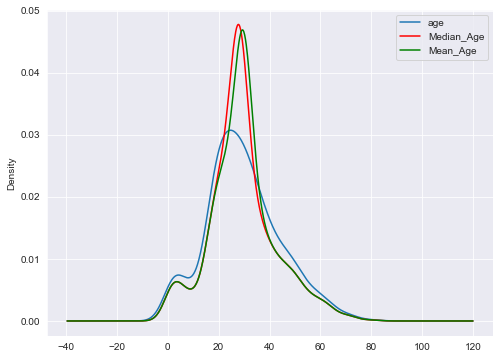

In [27]:
plt.rcParams["figure.figsize"] = [8,6]

fig = plt.figure()
ax = fig.add_subplot(111)

titanic_data['age'] .plot(kind='kde', ax=ax)

titanic_data['Median_Age'] .plot(kind='kde', ax=ax, color='red')

titanic_data['Mean_Age'] .plot(kind='kde', ax=ax, color='green')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

#### End of Distribution Imputation

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = [8,6]
sns.set_style("darkgrid")

titanic_data = sns.load_dataset('titanic')



titanic_data  = titanic_data[["survived", "pclass", "age", "fare"]]


titanic_data.isnull().mean()

survived    0.000000
pclass      0.000000
age         0.198653
fare        0.000000
dtype: float64

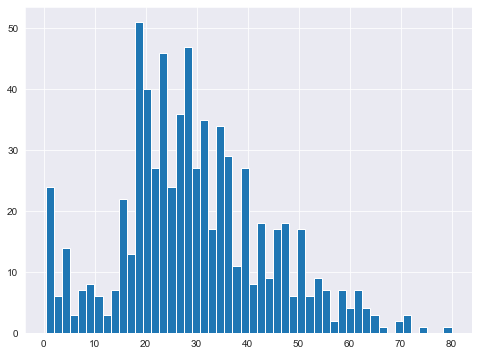

In [30]:
titanic_data.age.hist(bins=50)

In [31]:
eod_value = titanic_data.age.mean() + 3 * titanic_data.age.std()
print(eod_value)

73.27860964406095


In [32]:
import numpy as np

titanic_data['age_eod'] = titanic_data.age.fillna(eod_value)
titanic_data.head(20)

,survived,pclass,age,fare,age_eod
0,0,3,22.0,7.2500,22.00000
1,1,1,38.0,71.2833,38.00000
2,1,3,26.0,7.9250,26.00000
3,1,1,35.0,53.1000,35.00000
4,0,3,35.0,8.0500,35.00000
5,0,3,NaN,8.4583,73.27861
6,0,1,54.0,51.8625,54.00000
7,0,3,2.0,21.0750,2.00000
8,1,3,27.0,11.1333,27.00000
9,1,2,14.0,30.0708,14.00000


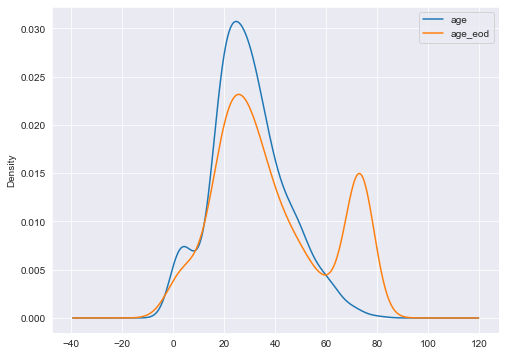

In [33]:
plt.rcParams["figure.figsize"] = [8,6]

fig = plt.figure()
ax = fig.add_subplot(111)

titanic_data['age'] .plot(kind='kde', ax=ax)
titanic_data['age_eod'] .plot(kind='kde', ax=ax)
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

### 3.2.2. Handling Missing Categorical Data

#### Frequent Category Imputation

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = [8,6]
sns.set_style("darkgrid")

titanic_data = sns.load_dataset('titanic')

titanic_data  = titanic_data[["embark_town", "age", "fare"]]
titanic_data.head()
titanic_data.isnull().mean()

embark_town    0.002245
age            0.198653
fare           0.000000
dtype: float64

Text(0, 0.5, 'Number of Passengers')

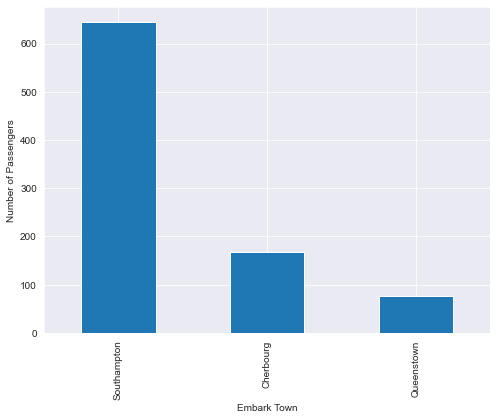

In [35]:
titanic_data.embark_town.value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('Embark Town')
plt.ylabel('Number of Passengers')

In [36]:
titanic_data.embark_town.mode()

0    Southampton
dtype: object

In [37]:
titanic_data.embark_town.fillna('Southampton', inplace=True)

In [38]:
titanic_data.age.mode()

0    24.0
dtype: float64

In [39]:
import numpy as np


titanic_data['age_mode'] = titanic_data.age.fillna(24)


titanic_data.head(20)

,embark_town,age,fare,age_mode
0,Southampton,22.0,7.2500,22.0
1,Cherbourg,38.0,71.2833,38.0
2,Southampton,26.0,7.9250,26.0
3,Southampton,35.0,53.1000,35.0
4,Southampton,35.0,8.0500,35.0
5,Queenstown,NaN,8.4583,24.0
6,Southampton,54.0,51.8625,54.0
7,Southampton,2.0,21.0750,2.0
8,Southampton,27.0,11.1333,27.0
9,Cherbourg,14.0,30.0708,14.0


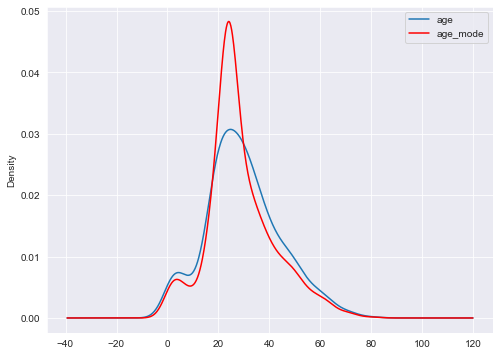

In [40]:
plt.rcParams["figure.figsize"] = [8,6]

fig = plt.figure()
ax = fig.add_subplot(111)

titanic_data['age'] .plot(kind='kde', ax=ax)

titanic_data['age_mode'] .plot(kind='kde', ax=ax, color='red')


lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

#### Missing Category Imputation

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = [8,6]
sns.set_style("darkgrid")

titanic_data = sns.load_dataset('titanic')

titanic_data  = titanic_data[["embark_town", "age", "fare"]]
titanic_data.head()
titanic_data.isnull().mean()

embark_town    0.002245
age            0.198653
fare           0.000000
dtype: float64

In [43]:
titanic_data.embark_town.fillna('Missing', inplace=True)

Text(0, 0.5, 'Number of Passengers')

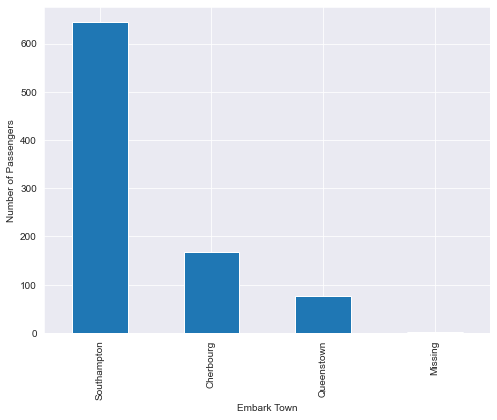

In [44]:
titanic_data.embark_town.value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('Embark Town')
plt.ylabel('Number of Passengers')

### 3.3. Categorical Data Encoding

### 3.3.1. One hot Encoding

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = [8,6]
sns.set_style("darkgrid")

titanic_data = sns.load_dataset('titanic')

titanic_data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [47]:
titanic_data  = titanic_data[["sex", "class", "embark_town"]]
titanic_data.head()

,sex,class,embark_town
0,male,Third,Southampton
1,female,First,Cherbourg
2,female,Third,Southampton
3,female,First,Southampton
4,male,Third,Southampton


In [48]:
print(titanic_data['sex'].unique())
print(titanic_data['class'].unique())
print(titanic_data['embark_town'].unique())

['male' 'female']
[Third, First, Second]
Categories (3, object): [Third, First, Second]
['Southampton' 'Cherbourg' 'Queenstown' nan]


In [49]:
import pandas as pd
temp = pd.get_dummies(titanic_data['sex'])

temp.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [50]:
pd.concat([titanic_data['sex'],
           pd.get_dummies(titanic_data['sex'])], axis=1).head()

,sex,female,male
0,male,0,1
1,female,1,0
2,female,1,0
3,female,1,0
4,male,0,1


In [51]:
import pandas as pd
temp = pd.get_dummies(titanic_data['embark_town'])

temp.head()

,Cherbourg,Queenstown,Southampton
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [52]:
import pandas as pd
temp = pd.get_dummies(titanic_data['embark_town'], drop_first = True)

temp.head()

,Queenstown,Southampton
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [53]:
import pandas as pd
temp = pd.get_dummies(titanic_data['embark_town'], dummy_na = True ,drop_first = True)

temp.head()

,Queenstown,Southampton,NaN
0,0,1,0
1,0,0,0
2,0,1,0
3,0,1,0
4,0,1,0


### 3.3.2. Label Encoding

In [55]:
# for integer encoding using sklearn
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

le.fit(titanic_data['class'])

titanic_data['le_class'] = le.transform(titanic_data['class'])

titanic_data.head()

,sex,class,embark_town,le_class
0,male,Third,Southampton,2
1,female,First,Cherbourg,0
2,female,Third,Southampton,2
3,female,First,Southampton,0
4,male,Third,Southampton,2


In [56]:
le.classes_

array(['First', 'Second', 'Third'], dtype=object)

## 3.4. - Data Discretization

### 3.4.1. Equal Width Discretization

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
plt.rcParams["figure.figsize"] = [8,6]
sns.set_style("darkgrid")

diamond_data = sns.load_dataset('diamonds')

diamond_data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


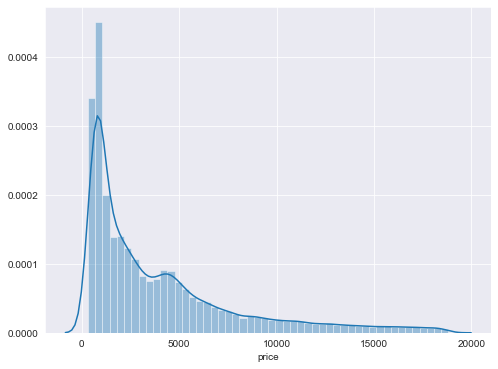

In [59]:
sns.distplot(diamond_data['price'])

In [60]:
price_range = diamond_data['price'].max() - diamond_data['price'].min()
print(price_range )

18497


In [61]:
price_range  / 10

1849.7

In [62]:

lower_interval = int(np.floor( diamond_data['price'].min()))
upper_interval = int(np.ceil( diamond_data['price'].max()))


interval_length = int(np.round(price_range / 10))

print(lower_interval)
print(upper_interval)
print(interval_length)

326
18823
1850


In [63]:
total_bins = [i for i in range(lower_interval, upper_interval+interval_length, interval_length)]
print(total_bins)

[326, 2176, 4026, 5876, 7726, 9576, 11426, 13276, 15126, 16976, 18826]


In [64]:
bin_labels = ['Bin_no_' + str(i) for i in range(1, len(total_bins))]
print(bin_labels)

['Bin_no_1', 'Bin_no_2', 'Bin_no_3', 'Bin_no_4', 'Bin_no_5', 'Bin_no_6', 'Bin_no_7', 'Bin_no_8', 'Bin_no_9', 'Bin_no_10']


In [65]:
diamond_data['price_bins'] = pd.cut(x=diamond_data['price'], bins=total_bins, labels=bin_labels,  include_lowest=True)
diamond_data.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z,price_bins
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,Bin_no_1
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,Bin_no_1
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,Bin_no_1
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,Bin_no_1
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,Bin_no_1
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,Bin_no_1
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47,Bin_no_1
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53,Bin_no_1
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49,Bin_no_1
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39,Bin_no_1


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

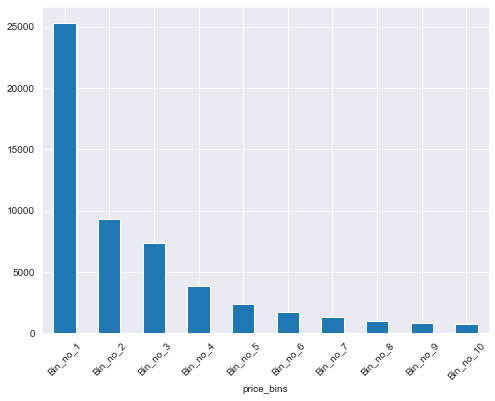

In [66]:
diamond_data.groupby('price_bins')['price'].count().plot.bar()
plt.xticks(rotation=45)


### 3.4.2. Equal Frequency Discretization

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
plt.rcParams["figure.figsize"] = [8,6]
sns.set_style("darkgrid")

diamond_data = sns.load_dataset('diamonds')

diamond_data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [68]:
discretised_price, bins = pd.qcut(diamond_data['price'], 10, labels=None, retbins=True, precision=3, duplicates='raise')

pd.concat([discretised_price, diamond_data['price']], axis=1).head(10)

,price,price
0,"(325.999, 646.0]",326
1,"(325.999, 646.0]",326
2,"(325.999, 646.0]",327
3,"(325.999, 646.0]",334
4,"(325.999, 646.0]",335
5,"(325.999, 646.0]",336
6,"(325.999, 646.0]",336
7,"(325.999, 646.0]",337
8,"(325.999, 646.0]",337
9,"(325.999, 646.0]",338


In [69]:
print(bins)
print(type(bins))

[  326.    646.    837.   1087.   1698.   2401.   3465.   4662.   6301.2
  9821.  18823. ]
<class 'numpy.ndarray'>


In [70]:
discretised_price.value_counts()

(325.999, 646.0]     5411
(1698.0, 2401.0]     5405
(837.0, 1087.0]      5396
(6301.2, 9821.0]     5395
(3465.0, 4662.0]     5394
(9821.0, 18823.0]    5393
(4662.0, 6301.2]     5389
(1087.0, 1698.0]     5388
(646.0, 837.0]       5385
(2401.0, 3465.0]     5384
Name: price, dtype: int64

In [71]:
bin_labels  = ['Bin_no_' +str(i) for i in range(1,11)]
print(bin_labels)

['Bin_no_1', 'Bin_no_2', 'Bin_no_3', 'Bin_no_4', 'Bin_no_5', 'Bin_no_6', 'Bin_no_7', 'Bin_no_8', 'Bin_no_9', 'Bin_no_10']


In [72]:
diamond_data['price_bins'] = pd.cut(x=diamond_data['price'], bins=bins, labels=bin_labels,  include_lowest=True)
diamond_data.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z,price_bins
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,Bin_no_1
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,Bin_no_1
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,Bin_no_1
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,Bin_no_1
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,Bin_no_1
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,Bin_no_1
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47,Bin_no_1
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53,Bin_no_1
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49,Bin_no_1
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39,Bin_no_1


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

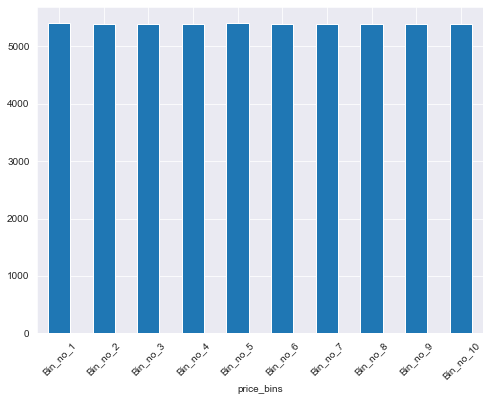

In [73]:
diamond_data.groupby('price_bins')['price'].count().plot.bar()
plt.xticks(rotation=45)

## 3.5. Outlier Handling

### 3.5.1. Outlier Trimming

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

plt.rcParams["figure.figsize"] = [8,6]
sns.set_style("darkgrid")

titanic_data = sns.load_dataset('titanic')

titanic_data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


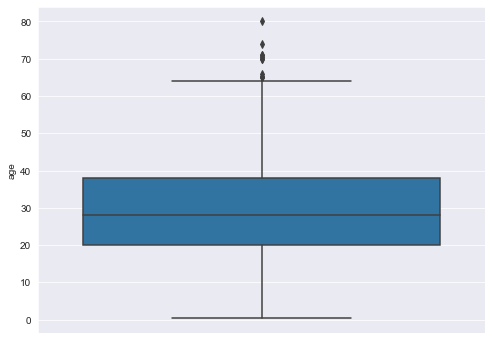

In [75]:
sns.boxplot( y='age', data=titanic_data)

In [76]:
IQR = titanic_data["age"].quantile(0.75) - titanic_data["age"].quantile(0.25)

lower_age_limit = titanic_data["age"].quantile(0.25) - (IQR * 1.5)
upper_age_limit = titanic_data["age"].quantile(0.75) + (IQR * 1.5)

print(lower_age_limit)
print(upper_age_limit)

-6.6875
64.8125


In [77]:
age_outliers = np.where(titanic_data["age"] > upper_age_limit, True,
                       np.where(titanic_data["age"] < lower_age_limit, True, False))

In [78]:
titanic_without_age_outliers = titanic_data.loc[~(age_outliers), ]

titanic_data.shape, titanic_without_age_outliers.shape

((891, 15), (880, 15))

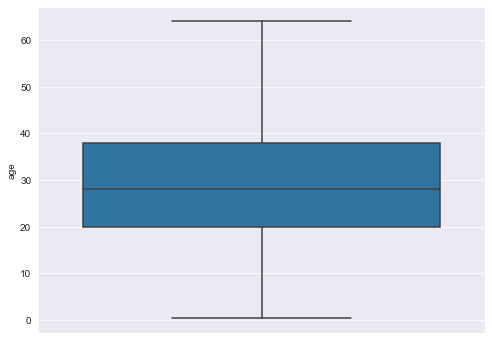

In [79]:
sns.boxplot( y='age', data = titanic_without_age_outliers)

### 3.5.2. Outlier Capping Using Mean & Standard Deviation

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

plt.rcParams["figure.figsize"] = [8,6]
sns.set_style("darkgrid")

titanic_data = sns.load_dataset('titanic')

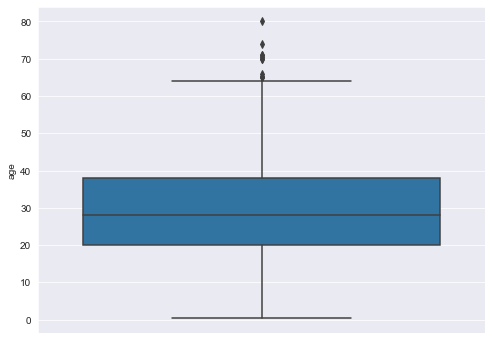

In [81]:
sns.boxplot( y='age', data=titanic_data)

In [82]:

lower_age_limit = titanic_data["age"].mean() - (3 * titanic_data["age"].std())
upper_age_limit = titanic_data["age"].mean() + (3 * titanic_data["age"].std())

print(lower_age_limit)
print(upper_age_limit)

-13.88037434994331
73.27860964406095


In [83]:
titanic_data["age"]= np.where(titanic_data["age"] > upper_age_limit, upper_age_limit,
                       np.where(titanic_data["age"] < lower_age_limit, lower_age_limit, titanic_data["age"]))

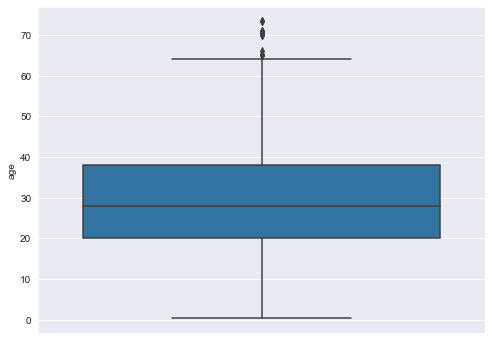

In [84]:
sns.boxplot( y='age', data=titanic_data)

## Exercise 3.1

#### Question 1

Which of the following techniques can be used to remove outliers from a dataset?

A. Trimming \
B. Censoring \
C. Discretization \
D. All of the above

Answer: D
    
#### Question 2

Which attribute is set to True to remove the first column from the one-hot encoded columns generated via get_dummies() method?

A. drop_first \
B. remove_first \
C. delete_first \
D. None of the above

Answer: A
    

#### Question 3

After standardisation the mean value of the dataset becomes:

A. 1 \
B. 0 \
C. -1 \
D. None of the above

Answer: B
    

## Exercise 3.2

Replace the missing values in the "deck" column of the Titanic dataset by the most 
frequently occuring categories in that column. Plot a bar plot for the updated "deck" column. 

**Solution:**

Text(0, 0.5, 'Number of Passengers')

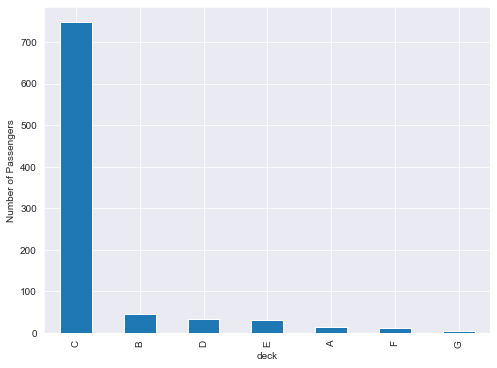

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = [8,6]
sns.set_style("darkgrid")

titanic_data = sns.load_dataset('titanic')

titanic_data  = titanic_data[["deck"]]
titanic_data.head()
titanic_data.isnull().mean()

titanic_data.deck.value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('deck')
plt.ylabel('Number of Passengers')

titanic_data.deck.mode()

titanic_data.deck.fillna('C', inplace=True)

titanic_data.deck.value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('deck')
plt.ylabel('Number of Passengers')